# **CIÊNCIA DE DADOS** - DCA3501

UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE, NATAL/RN

DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO

(C) 2025-2026 CARLOS M D VIEGAS

https://github.com/cmdviegas


# Distribuições de Frequência e Probabilidade

Este notebook apresenta conceitos fundamentais sobre distribuições de frequência e probabilidade, aplicados a dados discretos e contínuos.

Vamos seguir as seguintes etapas:
1. Distribuições de Frequência
2. Distribuições Discretas  
2.1. Bernoulli  
2.2. Binomial  
2.3. Poisson  
3. Distribuições Contínuas  
3.1. Normal  
3.2. Exponencial  
3.3. Uniforme
4. Função de Distribuição Acumulada (CDF)

## Importação das bibliotecas

In [16]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

np.random.seed(42) # fixa a aleatoriedade para que os resultados sejam sempre os mesmos


## 1. Distribuições de Frequência

As distribuições de frequência organizam e resumem dados mostrando quantas vezes cada valor aparece.

Vamos criar um conjunto de notas de alunos e calcular:

- Frequência Absoluta (*`fi`*): número de ocorrências;
- Frequência Relativa (*`fri`*): proporção em relação ao total;
- Frequência Acumulada (*`Fi`*): soma progressiva das frequências;
- Frequência Relativa Acumulada (*`Fri`*): soma progressiva das proporções.


In [18]:
# Exemplo: notas obtidas por 30 alunos
notas = [5, 6, 7, 8, 8, 8, 9, 5, 6, 7, 7, 7, 9, 10, 6, 8, 9, 10, 5, 6, 6, 7, 8, 9, 5, 6, 7, 7, 8, 9]
df = pd.DataFrame({'nota': notas})
df.head()

,nota
0,5
1,6
2,7
3,8
4,8


Frequência Absoluta (*`fi`*)

In [19]:
# Quantos alunos tiraram tal nota?
freq_abs = df['nota'].value_counts().sort_index()
freq_abs

# .value_counts() -> Conta quantas vezes cada valor distinto aparece nessa coluna (gera uma tabela de frequência absoluta)
# .sort_index() -> Ordena o resultado pelo índice — ou seja, pelas notas (valores), não pela frequência

nota
5     4
6     6
7     7
8     6
9     5
10    2
Name: count, dtype: int64

<Axes: title={'center': 'Frequência Absoluta das Notas'}, xlabel='Nota', ylabel='Frequência'>

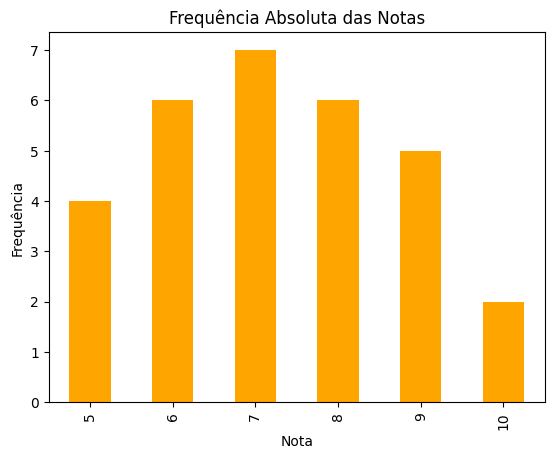

In [20]:
# Gráfico de barras - Frequência Absoluta
freq_abs.plot(kind='bar', title='Frequência Absoluta das Notas', xlabel='Nota', ylabel='Frequência', color='orange')

Frequência Relativa (*`fri`*)

In [21]:
# Qual a porcentagem de alunos que obtiveram aquela nota?
freq_rel = df['nota'].value_counts(normalize=True).sort_index()
freq_rel

# .value_counts(normalize=True) -> Faz o mesmo que .value_counts(), mas divide cada contagem pelo total de elementos

nota
5     0.133333
6     0.200000
7     0.233333
8     0.200000
9     0.166667
10    0.066667
Name: proportion, dtype: float64

<Axes: title={'center': 'Frequência Relativa das Notas'}, xlabel='Nota', ylabel='Proporção'>

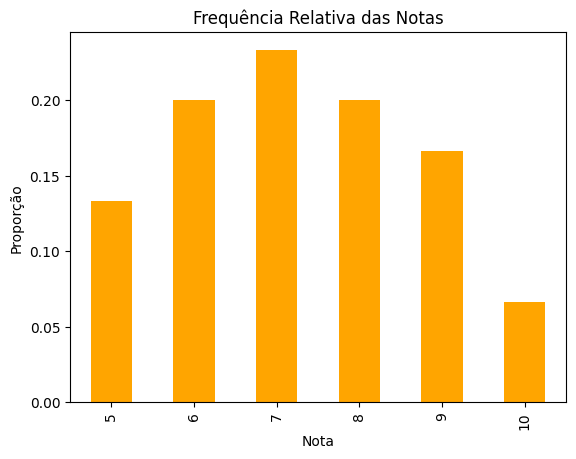

In [22]:
# Gráfico de barras - Frequência Relativa
freq_rel.plot(kind='bar', title='Frequência Relativa das Notas', xlabel='Nota', ylabel='Proporção', color='orange')

Frequência Acumulada (*`Fi`*)

In [23]:
# Quantos alunos tiraram até aquela nota?
freq_acum = freq_abs.cumsum()
freq_acum

nota
5      4
6     10
7     17
8     23
9     28
10    30
Name: count, dtype: int64

<Axes: title={'center': 'Frequência Acumulada'}, xlabel='Nota', ylabel='Frequência'>

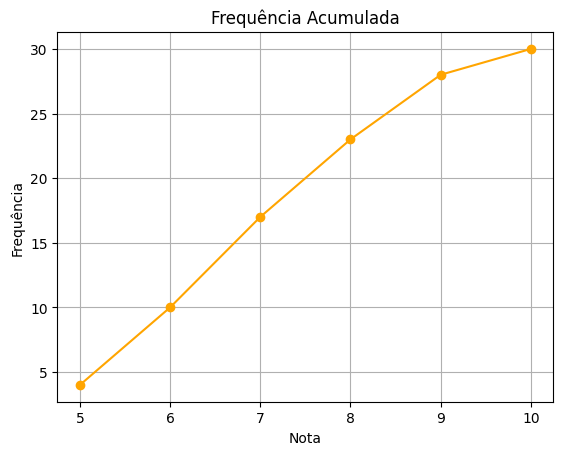

In [24]:
# Gráfico de linha - Frequência Acumulada
freq_acum.plot(kind='line', marker='o', title='Frequência Acumulada', xlabel='Nota', ylabel='Frequência', color='orange', grid=True)

Frequência Relativa Acumulada (*`Fri`*)

In [25]:
# Qual a porcentagem de alunos que obtiveram até aquela nota?
freq_rel_acum = freq_rel.cumsum()
display(freq_rel)
display(freq_rel_acum)

nota
5     0.133333
6     0.200000
7     0.233333
8     0.200000
9     0.166667
10    0.066667
Name: proportion, dtype: float64

nota
5     0.133333
6     0.333333
7     0.566667
8     0.766667
9     0.933333
10    1.000000
Name: proportion, dtype: float64

<Axes: title={'center': 'Frequência Relativa Acumulada'}, xlabel='Nota', ylabel='Proporção Acumulada'>

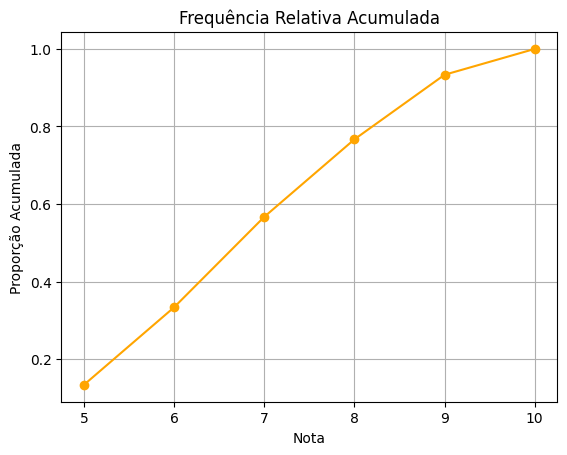

In [26]:
# Gráfico de linha - Frequência Relativa Acumulada
freq_rel_acum.plot(kind='line', marker='o', title='Frequência Relativa Acumulada', xlabel='Nota', ylabel='Proporção Acumulada', color='orange', grid=True)

In [27]:
# Tabela final com todas as colunas
freq_table = pd.DataFrame({
    'Frequência Absoluta': freq_abs,
    'Frequência Relativa': freq_rel.round(4),
    'Frequência Acumulada': freq_acum,
    'Frequência Relativa Acumulada': freq_rel_acum.round(4)
})
freq_table

,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Relativa Acumulada
nota,,,,
5,4,0.1333,4,0.1333
6,6,0.2000,10,0.3333
7,7,0.2333,17,0.5667
8,6,0.2000,23,0.7667
9,5,0.1667,28,0.9333
10,2,0.0667,30,1.0000


## 2. Distribuições de Probabilidade (Discretas)

Uma distribuição Discreta lista todos os valores possíveis de uma variável e suas probabilidades.

A maneira formal de representar essa distribuição é por meio da Função de Massa de Probabilidade (PMF), que atribui uma probabilidade a cada valor discreto da variável.

 <br>

**Função de Massa de Probabilidade (PMF)**

A PMF descreve a probabilidade de uma variável aleatória discreta assumir um determinado valor.

Para uma variável aleatória $X$, a PMF é definida como:

$$
P(X = x) = f(x)
$$

onde:

- $x$ representa um valor possível da variável $X$;
- $f(x) \geq 0 $ para todo $x$;
- $\sum_x f(x) = 1$, ou seja, a soma de todas as probabilidades é igual a $1$.

<br>

A PMF se aplica apenas a variáveis discretas que assumem valores contáveis. Ela atribui uma probabilidade exata a cada valor, o que a diferencia das distribuições contínuas (que usam PDF e lidam com intervalos).

<br>

Vamos estudar as seguintes distribuições discretas:
* Bernoulli;
* Binomial;
* Poisson.



### 2.1. Distribuição de Bernoulli

A Distribuição de Bernoulli modela um evento com dois possíveis resultados (sucesso ou fracasso).

Esta distribuição é adequada para eventos binários como:

- Aprovado (1) ou Reprovado (0);
- Cara (1) ou Coroa (0);
- Presença (1) ou Ausência (0).

<br>

Definição:

Seja $X$ uma variável aleatória com distribuição de Bernoulli, então:

$$
P(X = 1) = p \quad \text{e} \quad P(X = 0) = 1 - p
$$

onde:

- $p$ é a probabilidade de sucesso ($0 \leq p \leq 1$);
- $1 - p$ é a probabilidade de fracasso.

<br>

A Distribuição de Bernoulli possui:

- Valor esperado (média):

  $$
  \mathbb{E}[X] = p
  $$

- Variância:

  $$
  \text{Var}(X) = p(1 - p)
  $$

<br>

A PMF da Bernoulli é dada por:

$$
P(X = x) = p^x (1 - p)^{1 - x}, \quad \text{para } x \in \{0, 1\}
$$



In [28]:
# O aluno foi aprovado (nota ≥ 7) ou reprovado (nota < 7)?
df['aprovado'] = (df['nota'] >= 7).astype(int)
p = df['aprovado'].mean()
print(f"Probabilidade de sucesso (p): {p:.2f}")

Probabilidade de sucesso (p): 0.67


In [29]:
# Podemos simular vários alunos seguindo essa probabilidade
n = 1000
sim_bern = np.random.binomial(1, p, n) # Simula n eventos de Bernoulli com probabilidade p
pd.Series(sim_bern).value_counts(normalize=True)

1    0.685
0    0.315
Name: proportion, dtype: float64

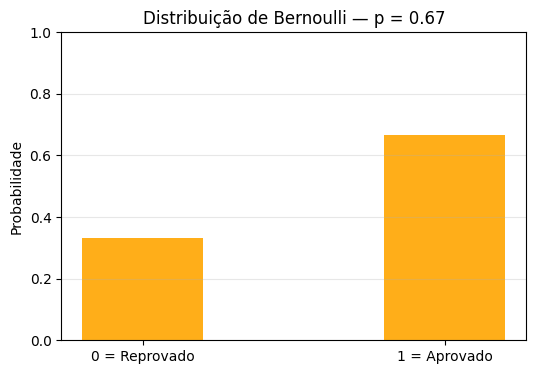

In [30]:
x = [0, 1] # Valores da variável: 0 = Reprovado, 1 = Aprovado
probs = [1 - p, p] # Probabilidades para os valores [0 = fracasso, 1 = sucesso]

# Gráfico da distribuição de Bernoulli
plt.figure(figsize=(6,4))
plt.bar(x, probs, color='orange', alpha=0.9, width=0.4)
plt.xticks(x, ['0 = Reprovado', '1 = Aprovado'])
plt.ylim(0, 1)
plt.title(f'Distribuição de Bernoulli — p = {p:.2f}')
plt.ylabel('Probabilidade')
plt.grid(axis='y', alpha=0.3)
plt.show()

Interpretação do gráfico

- Cada "lançamento" representa um aluno (sucesso = aprovado, fracasso = reprovado);

- A média dos 0's e 1's se aproxima de `p` (a probabilidade de aprovação).

### 2.2. Distribuição Binomial

A Distribuição Binomial modela o número de sucessos em $n$ tentativas independentes, cada uma com probabilidade $p$ de sucesso. Ela é uma generalização da distribuição de Bernoulli, que considera apenas uma única tentativa.  

Na Binomial, estamos interessados em quantos sucessos ocorrem em um conjunto de $n$ experimentos repetidos sob as mesmas condições. Ou seja, ela é usada quando repetimos o mesmo experimento várias vezes, de forma **independente** e com a **mesma probabilidade de sucesso em cada uma das tentativas.

Exemplos de aplicações incluem:

- Número de alunos aprovados em uma turma com 10 alunos;
- Número de caras ao lançar uma moeda várias vezes;
- Número de peças com defeito em um lote de produção.

<br>

Definição:

Seja $X$ uma variável aleatória com Distribuição Binomial, então:

$$
X \sim \text{Bin}(n, p)
$$

onde:

- $n$ = número de tentativas;
- $p$ = probabilidade de sucesso em cada tentativa.

<br>

A Distribuição Binomial possui:

- Valor esperado (média):

  $$
  \mathbb{E}[X] = np
  $$

- Variância:

  $$
  \text{Var}(X) = np(1 - p)
  $$

<br>

A PMF da Binomial é:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}, \quad \text{para } k = 0, 1, \ldots, n
$$  

O termo $\binom{n}{k}$ é chamado de coeficiente binomial: $\binom{n}{k} = \frac{n!}{k!(n - k)!}$

Esse valor indica quantas formas diferentes existem de obter exatamente $k$ sucessos em $n$ tentativas.

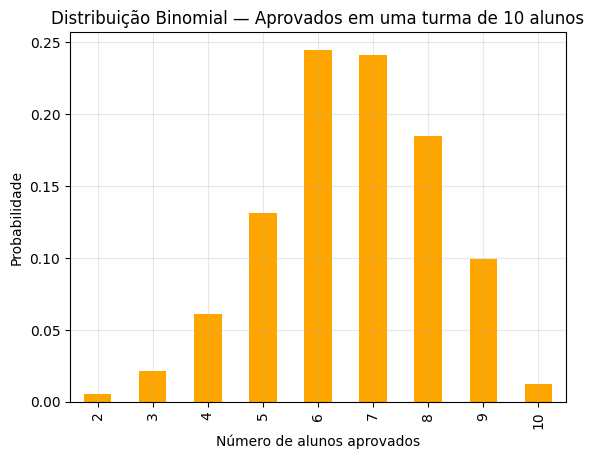

In [31]:
# Em uma turma de 10 alunos, quantos serão aprovados?
n_alunos = 10
p = df['aprovado'].mean() # Estima a probabilidade de aprovação com base na média

sim_binom = np.random.binomial(n=n_alunos, p=p, size=1000) # Simula a distribuição binomial: número de aprovados em 1000 turmas com n_alunos

pd.Series(sim_binom).value_counts(normalize=True).sort_index().plot(kind='bar', color='orange')
plt.title('Distribuição Binomial — Aprovados em uma turma de 10 alunos')
plt.xlabel('Número de alunos aprovados')
plt.ylabel('Probabilidade')
plt.grid(True, alpha=0.3)
plt.show()

Interpretação do gráfico

- O eixo X mostra quantos alunos (de um total de 10) foram aprovados.

- O formato se aproxima de uma curva simétrica, com maior probabilidade perto do valor esperado `n * p`.

- "Se montarmos várias turmas de 10 alunos com a mesma taxa de aprovação, normalmente teremos 6 ou 7 alunos aprovados por turma. Turmas com todos aprovados (10) ou todos reprovados (0) são raras."

### 2.3. Distribuição de Poisson

A Distribuição de Poisson modela o número de vezes que um evento ocorre dentro de um intervalo fixo de tempo, espaço, área ou volume, quando esses eventos:

- Acontecem de forma independente;
- Ocorrem a uma taxa média constante;
- São raros em relação ao número total de oportunidades.

É amplamente usada para modelar contagens de eventos raros ou aleatórios que ocorrem continuamente ao longo do tempo ou do espaço.

Exemplos de aplicações:

- Número de chamadas recebidas por um call center em 1 hora;
- Número de acidentes em um cruzamento por dia;
- Número de clientes que chegam em uma loja por minuto.

<br>

Definição:

Seja $X$ uma variável aleatória com distribuição de Poisson, então:

$$
X \sim \text{Poisson}(\lambda)
$$

onde:

- $\lambda > 0$ é a taxa média de ocorrência dos eventos;
- $X$ representa o número de eventos que ocorrem em um intervalo fixo.

<br>

A distribuição de Poisson tem a média igual à variância.

- Valor esperado (média):

  $$
  \mathbb{E}[X] = \lambda
  $$

- Variância:

  $$
  \text{Var}(X) = \lambda
  $$

<br>

A PMF da Poisson é dada por:

$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad \text{para } k = 0, 1, 2, \ldots
$$

Média esperada de notas 10 por turma: 0.67



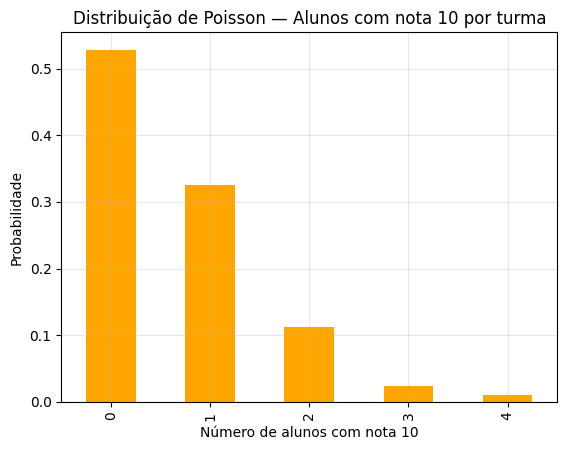

In [32]:
# "Quantos alunos tiram exatamente 10 em uma turma?"

λ = (df['nota'] == 10).sum() / len(df) * 10  # Média esperada de notas 10 por turma de 10 alunos
print(f"Média esperada de notas 10 por turma: {λ:.2f}\n")

sim_poisson = np.random.poisson(lam=λ, size=1000) # Simula 1000 contagens de eventos com média λ (distribuição de Poisson)

pd.Series(sim_poisson).value_counts(normalize=True).sort_index().plot(kind='bar', color='orange')
plt.title('Distribuição de Poisson — Alunos com nota 10 por turma')
plt.xlabel('Número de alunos com nota 10')
plt.ylabel('Probabilidade')
plt.grid(True, alpha=0.3)
plt.show()


Interpretação do gráfico

- Mostra a probabilidade de 0, 1, 2, ... alunos tirarem 10 numa turma de mesmo tamanho.

- Útil para eventos raros e independentes (como tirar nota máxima).

## 3. Distribuições de Probabilidade (Contínuas)

Uma distribuição Contínua representa variáveis que podem assumir qualquer valor em um intervalo. Nestes casos, não falamos em probabilidade de valores exatos, mas sim de intervalos, calculados por meio da Função Densidade de Probabilidade (PDF).

<br>

Função Densidade de Probabilidade (PDF)**

A PDF descreve o comportamento de variáveis aleatórias contínuas.  
Diferente da PMF, que atribui uma probabilidade a valores exatos, a PDF não fornece diretamente probabilidades pontuais. Isso porque, em variáveis contínuas, a probabilidade de assumir um valor exato é sempre zero:

$$
P(X = x) = 0
$$

Em vez disso, a PDF permite calcular a probabilidade de que a variável esteja dentro de um intervalo.

Por exemplo, para uma variável contínua $X$ com PDF $f(x)$, a probabilidade de $X$ cair entre dois valores $a$ e $b$ é dada por:

$$
P(a \leq X \leq b) = \int_a^b f(x) \, dx
$$

Ou seja, a probabilidade é a área sob a curva da PDF entre os pontos $a$ e $b$.

Para que uma função seja válida como PDF, ela deve satisfazer duas condições:

- $f(x) \geq 0$ para todo $x$;
- A área total sob a curva deve ser igual a 1:

$$
\int_{-\infty}^{\infty} f(x) \, dx = 1
$$

### 3.1. Distribuição Normal

A Distribuição Normal (ou distribuição Gaussiana) é usada para modelar fenômenos naturais e comportamentos de variáveis contínuas que tendem a se concentrar em torno da média.

A curva é simétrica em torno da média ($\mu$) e tem formato de sino.

Propriedades da Normal:

- Simétrica em torno da média ($\mu = 0$);
- A maior parte dos valores está próxima da média;
- As caudas da curva se estendem ao infinito, mas a densidade tende a zero;
- **68%** dos valores estão entre $-1\sigma$ e $+1\sigma$;
- **95%** entre $-2\sigma$ e $+2\sigma$;
- **99.7%** entre $-3\sigma$ e $+3\sigma$.

Exemplos de fenômenos que seguem a Distribuição Normal:

- Alturas de pessoas;
- Peso corporal;
- Tempo de reação.

<br>

Definição:

Se $X$ é uma variável com Distribuição Normal, escrevemos:

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

<br>

A Distribuição Normal possui:

- Valor esperado (média):

  $$
  \mathbb{E}[X] = \mu
  $$

- Variância:

  $$
  \text{Var}(X) = \sigma^2
  $$

<br>

A PDF da Normal é dada por:

$$
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
$$


In [33]:
# Geração de um dataset fictício com alturas de 450 jogadores da NBA (seguindo uma distribuição normal)
alturas_m = np.random.normal(loc=2.00, scale=0.10, size=450)  # Alturas simuladas com média de 2,00 m e desvio padrão de 0,10 m
alturas_m = np.clip(alturas_m, 1.75, 2.25)  # Limita os valores entre 1,75 m e 2,25 m para evitar extremos irreais
df_nba = pd.DataFrame({'altura_m': alturas_m}) # Cria o dataframe
#df_nba.head()

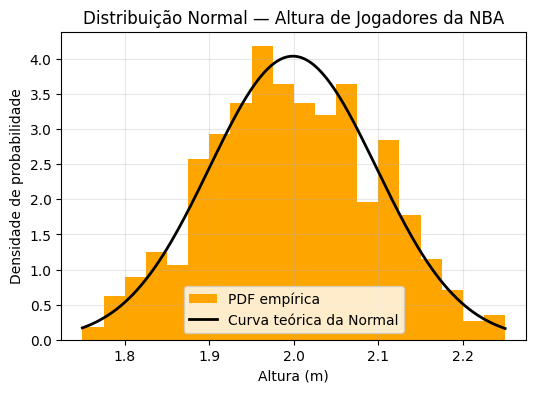

In [34]:
# Histograma + curva teórica da Normal
plt.figure(figsize=(6,4))
plt.hist(df_nba['altura_m'], bins=20, density=True, color='orange', label='PDF empírica') # Dados observados

# Curva teórica da Normal
x = np.linspace(1.75, 2.25, 200) # Cria 200 pontos igualmente espaçados entre 1,75m e 2,25m / Serve como eixo contínuo para calcular e plotar a curva teórica da distribuição normal sobre o histograma
media = df_nba['altura_m'].mean() # Média
desvio = df_nba['altura_m'].std() # Desvio padrão
y = (1 / (desvio * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media) / desvio)**2) # PDF teórica

# De forma mais simples podemos usar o Scipy para calcular a PDF f(x)
#y = st.norm.pdf(x, loc=media, scale=desvio) # PDF teórica (scipy)

plt.plot(x, y, color='black', lw=2, label='Curva teórica da Normal')
plt.title('Distribuição Normal — Altura de Jogadores da NBA')
plt.xlabel('Altura (m)')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3.2. Distribuição Exponencial

A Distribuição Exponencial modela o tempo até a ocorrência de um evento,  como o tempo de espera em filas ou o tempo entre falhas.

Esta distribuição assume que os eventos ocorrem de forma contínua, independente e a uma taxa constante.

Definição:

Seja $X$ uma variável aleatória contínua que segue uma distribuição exponencial com parâmetro $\lambda > 0$, então:

$$
X \sim \text{Exp}(\lambda)
$$

onde:

- $\lambda$ é a taxa média de ocorrência dos eventos (por unidade de tempo);
- $X$ representa o tempo até o próximo evento.

<br>

A distribuição exponencial possui as seguintes propriedades:

- Valor esperado (média):

  $$
  \mathbb{E}[X] = \frac{1}{\lambda}
  $$

- Variância:

  $$
  \text{Var}(X) = \frac{1}{\lambda^2}
  $$


<br>

A PDF da Exponencial é dada por:

$$
f(x) = \lambda e^{-\lambda x}, \quad \text{para } x \geq 0
$$

- $f(x)$ indica a densidade de probabilidade para o tempo $x$;
- A PDF decresce exponencialmente — ou seja, quanto maior o tempo, menor a chance de ele ocorrer.

<br>

O gráfico da PDF da distribuição exponencial é assimétrico e decrescente, com valor máximo em $x = 0$ e decaimento exponencial à medida que $x$ aumenta.

- Quando $\lambda$ é alto: a curva decai rapidamente (eventos ocorrem rapidamente);
- Quando $\lambda$ é baixo: a curva decai lentamente (eventos mais espaçados).

A área sob a curva entre dois valores representa a probabilidade do evento ocorrer naquele intervalo de tempo.



In [35]:
# Simula o tempo (em minutos) até a chegada de 450 clientes em uma loja (seguindo uma distribuição exponencial)
tempos_espera = np.random.exponential(scale=2.0, size=450)  # média = 2 minutos
tempos_espera = np.clip(tempos_espera, 0, 10)  # remove valores extremos para visualização
df_exp = pd.DataFrame({'tempo_min': tempos_espera})

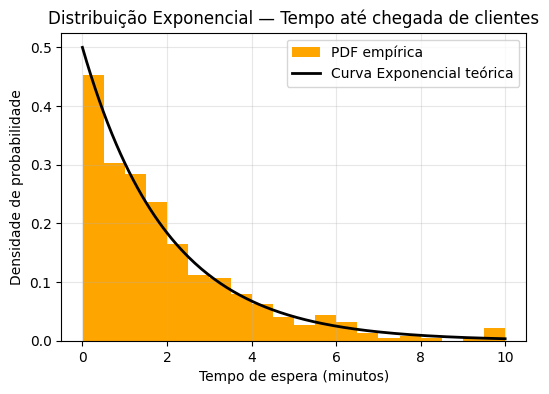

In [36]:
# Histograma (PDF empírica)
plt.figure(figsize=(6,4))
plt.hist(df_exp['tempo_min'], bins=20, density=True, color='orange', label='PDF empírica')

# Curva teórica da distribuição exponencial
x = np.linspace(0, 10, 200)
λ = 1 / 2.0  # lambda = 1 / média
y = λ * np.exp(-λ * x)

# De forma mais simples podemos usar o Scipy para calcular a PDF f(x)
#y = st.expon.pdf(x, loc=0, scale=1/λ) # PDF com SciPy

plt.plot(x, y, color='black', lw=2, label='Curva Exponencial teórica')
plt.title('Distribuição Exponencial — Tempo até chegada de clientes')
plt.xlabel('Tempo de espera (minutos)')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.3. Distribuição Uniforme

A Distribuição Uniforme é usada para modelar situações onde todos os valores dentro de um intervalo são igualmente prováveis.

Exemplos de fenômenos que podem ser modelados com uma distribuição uniforme:

- Geração de números aleatórios entre dois valores;
- Sorteio de horários dentro de um período fixo.

<br>

Definição:

Seja $X$ uma variável aleatória contínua com distribuição uniforme no intervalo $[a, b]$, então:

$$
X \sim \text{Uniform}(a, b)
$$

onde:

- $a$ é o valor mínimo;
- $b$ é o valor máximo;
- A densidade de probabilidade é constante em todo o intervalo.

<br>

A distribuição uniforme possui as seguintes propriedades:

- Valor esperado (média):

  $$
  \mathbb{E}[X] = \frac{a + b}{2}
  $$

- Variância:

  $$
  \text{Var}(X) = \frac{(b - a)^2}{12}
  $$

<br>

A PDF da distribuição uniforme é dada por:

$$
f(x) =
\begin{cases}
\dfrac{1}{b - a}, & \text{se } a \leq x \leq b \\
0, & \text{caso contrário}
\end{cases}
$$

- A densidade é constante no intervalo $[a, b]$;
- A área total sob a curva ainda é igual a 1.

<br>

O gráfico da PDF da distribuição uniforme contínua é um retângulo:

- A altura da curva é constante e igual a $1 / (b - a)$;
- A área sob a curva entre dois valores representa a probabilidade de cair nesse intervalo.

In [37]:
# Simula horários de chegada entre 8h e 10h (seguindo uma distribuição uniforme)
chegadas = np.random.uniform(low=8.0, high=10.0, size=450)
df_uni = pd.DataFrame({'hora_chegada': chegadas})

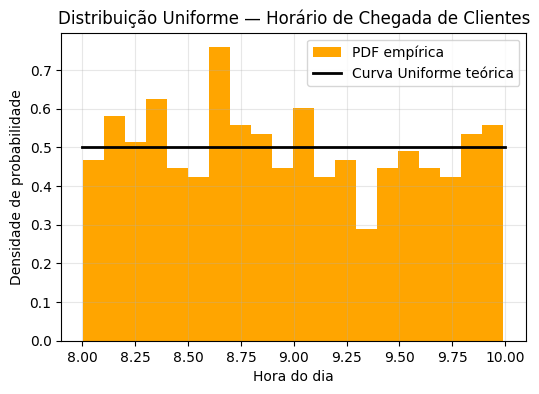

In [38]:
# Histograma (PDF empírica)
plt.figure(figsize=(6,4))
plt.hist(df_uni['hora_chegada'], bins=20, density=True, color='orange', label='PDF empírica')

# Curva teórica Uniforme
a, b = 8.0, 10.0
x = np.linspace(a, b, 200)
y = np.ones_like(x) * (1 / (b - a))  # Densidade constante

# De forma mais simples podemos usar o Scipy para calcular a PDF f(x)
#y = st.uniform.pdf(x, loc=a, scale=(b - a))

plt.plot(x, y, color='black', lw=2, label='Curva Uniforme teórica')
plt.title('Distribuição Uniforme — Horário de Chegada de Clientes')
plt.xlabel('Hora do dia')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Interpretação do gráfico:

- Os dados simulados seguem uma distribuição uniforme no intervalo $[8,\ 10]$, como indicado pela correspondência entre a PDF empírica e a teórica, ou seja, todos os valores nesse intervalo possuem igual probabilidade de ocorrer;
- A linha preta está posicionada em $f(x) = 0{,}5$, indicando a PDF teórica da distribuição uniforme;
- As barras do histograma mostram a densidade observada nos dados simulados;
- Há variações naturais entre as barras, pois os dados são gerados aleatoriamente. No entanto, essas flutuações estão em torno do valor esperado $(0{,}5)$.


## 4. Função de Distribuição Acumulada (CDF)

A Função de Distribuição Acumulada (CDF) representa a probabilidade acumulada até um determinado valor.

Serve para responder a:  
> "Qual a chance de a variável ser menor ou igual a certo valor $x$?"

Exemplo:

Considere uma variável aleatória representando a nota de um aluno.  
A CDF responde perguntas como:
- Qual a chance de um aluno tirar nota até 7?
- Ou: qual a proporção de dados abaixo de um certo valor?

A CDF é definida para qualquer tipo de distribuição seja **discreta** ou **contínua**.


### Discretas:

Para variáveis como Bernoulli, Binomial ou Poisson, a CDF é a soma das probabilidades até um determinado valor:

$$
F(x) = \sum_{k=0}^{x} P(X = k)
$$

### Contínuas:

Para variáveis como Normal, Exponencial ou Uniforme, a CDF representa a probabilidade acumulada até $x$:

$$
F(x) = P(X \leq x)
$$

Ou seja, a CDF indica a área sob a curva da PDF até o ponto $x$.

### Propriedades da CDF:

- Sempre crescente (nunca diminui);
- Os valores de $F(x)$ estão no intervalo $[0,\ 1]$;
- Útil para:
  - Calcular probabilidades em intervalos:  
    $P(a \leq X \leq b) = F(b) - F(a)$
  - Determinar quantis, percentis e mediana.

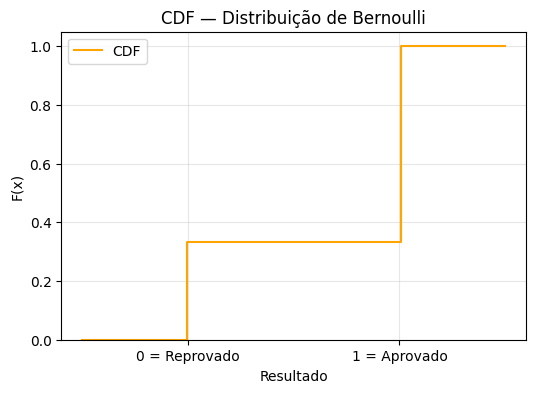

In [39]:
# CDF da Bernoulli
x_vals = np.linspace(-0.5, 1.5, 100)
cdf_vals = st.bernoulli.cdf(x_vals, p)

plt.figure(figsize=(6, 4))
plt.step(x_vals, cdf_vals, where='mid', color='orange', label='CDF')
plt.xticks([0, 1], ['0 = Reprovado', '1 = Aprovado'])
plt.ylim(0, 1.05)
plt.title('CDF — Distribuição de Bernoulli')
plt.xlabel('Resultado')
plt.ylabel('F(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Interpretação do gráfico

- F(0) ≈ 0.34  
  Cerca de 34% dos alunos foram reprovados (resultado 0).

- F(1) = 1.00  
  Todos os alunos estão entre 0 e 1, ou seja, 100% têm resultado menor ou igual a 1.

A curva tem dois degraus:

- Antes de x = 0, F(x) = 0;
- No ponto x = 0, a CDF salta para a probabilidade de reprovação (P(X = 0));  
- No ponto x = 1, a CDF atinge 1, acumulando toda a probabilidade.

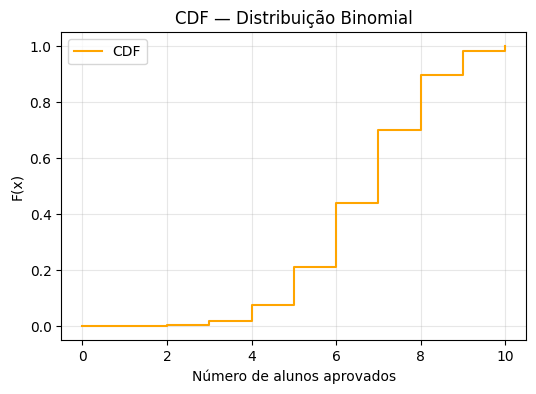

In [40]:
# CDF da Binomial
x_vals = np.arange(0, n_alunos + 1)
cdf_vals = st.binom.cdf(x_vals, n=n_alunos, p=p)

plt.figure(figsize=(6, 4))
plt.step(x_vals, cdf_vals, where='post', color='orange', label='CDF')
plt.title('CDF — Distribuição Binomial')
plt.xlabel('Número de alunos aprovados')
plt.ylabel('F(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Interpretação do gráfico

Cada degrau da curva representa a chance acumulada de até k alunos serem aprovados:

- F(4) ≈ 0.08  
  Apenas 8% das turmas têm até 4 alunos aprovados.

- F(6) ≈ 0.45  
  Cerca de 45% das turmas têm no máximo 6 aprovações.

- F(8) ≈ 0.88  
  Aproximadamente 88% das turmas têm até 8 alunos aprovados.

- F(10) = 1.00  
  Toda a distribuição está contida até o valor máximo possível de 10 alunos aprovados.

A curva é composta por degraus que crescem gradualmente, refletindo a soma das probabilidades P(X = k) para cada valor de k.


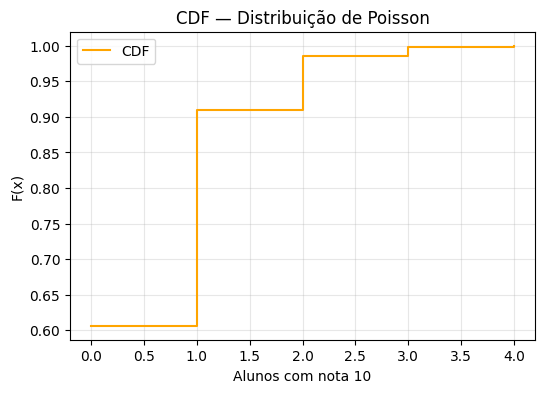

In [41]:
# CDF da Poisson
x_vals = np.arange(0, sim_poisson.max() + 1)
cdf_vals = st.poisson.cdf(x_vals, mu=λ)

plt.figure(figsize=(6, 4))
plt.step(x_vals, cdf_vals, where='post', color='orange', label='CDF')
plt.title('CDF — Distribuição de Poisson')
plt.xlabel('Alunos com nota 10')
plt.ylabel('F(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Interpretação do gráfico

Cada ponto da curva indica a probabilidade acumulada de que uma turma tenha até certo número de alunos com nota 10:

- F(0) ≈ 0,60  
  Cerca de 60% das turmas não têm nenhum aluno com nota 10.

- F(1) ≈ 0,91  
  Aproximadamente 91% das turmas têm no máximo 1 aluno com nota 10.<br>
.  
.  
.  
- F(4) = 1,00  
  100% das turmas têm até 4 alunos com nota 10.

Conclusão:

Notas 10 são raras. A grande maioria das turmas tem entre 0 e 2 alunos com nota máxima. Eventos com 3 ou mais são pouco prováveis.

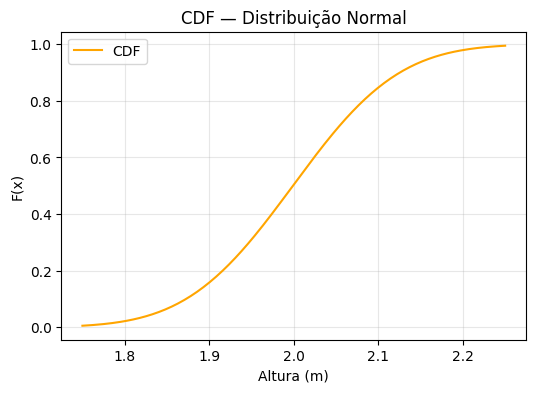

In [42]:
# CDF da Normal
x = np.linspace(1.75, 2.25, 200)
media = df_nba['altura_m'].mean()
desvio = df_nba['altura_m'].std()
cdf_vals = st.norm.cdf(x, loc=media, scale=desvio)

plt.figure(figsize=(6, 4))
plt.plot(x, cdf_vals, color='orange', label='CDF')
plt.title('CDF — Distribuição Normal')
plt.xlabel('Altura (m)')
plt.ylabel('F(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Interpretação do gráfico

Cada ponto da curva representa a probabilidade acumulada de um jogador ter altura menor ou igual a determinado valor:

- F(1,85 m) ≈ 0,10  
  Apenas 10% dos jogadores têm até 1,85m de altura.

- F(2,00 m) ≈ 0,50  
  50% dos jogadores têm até 2,00m de altura.  
  
- F(2,15 m) ≈ 0,90  
  90% dos jogadores têm altura até 2,15m.

Conclusão:

A curva mostra o padrão esperado de uma distribuição normal:  
- Crescimento lento nas extremidades (valores raros);  
- Crescimento rápido próximo da média (valores mais comuns);  
- A CDF tende para 1 à medida que a altura aumenta.

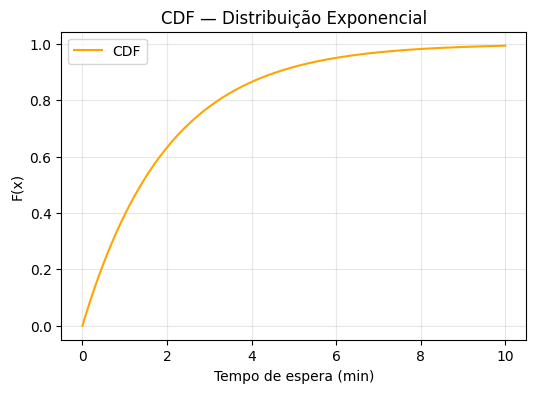

In [43]:
# CDF da Exponencial
x = np.linspace(0, 10, 200)
λ = 1 / 2.0  # média = 2 minutos
cdf_vals = st.expon.cdf(x, loc=0, scale=1/λ)

plt.figure(figsize=(6, 4))
plt.plot(x, cdf_vals, color='orange', label='CDF')
plt.title('CDF — Distribuição Exponencial')
plt.xlabel('Tempo de espera (min)')
plt.ylabel('F(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Interpretação do gráfico

Cada ponto da curva mostra a probabilidade acumulada de um cliente chegar em até certo tempo:

- F(1 min) ≈ 0,40  
  Cerca de 40% dos clientes chegam até o primeiro minuto.

- F(3 min) ≈ 0,78  
  Aproximadamente 78% chegam até os 3 minutos de espera.

- F(5 min) ≈ 0,92  
  Há 92% de chance de o cliente ter chegado até o 5º minuto.

- F(10 min) ≈ 1,00  
  Praticamente todos os clientes já chegaram até o décimo minuto.

Curva típica da exponencial:
- Cresce rápido no início (maior parte dos eventos acontece cedo);
- Vai se achatando depois (eventos tardios são mais raros).

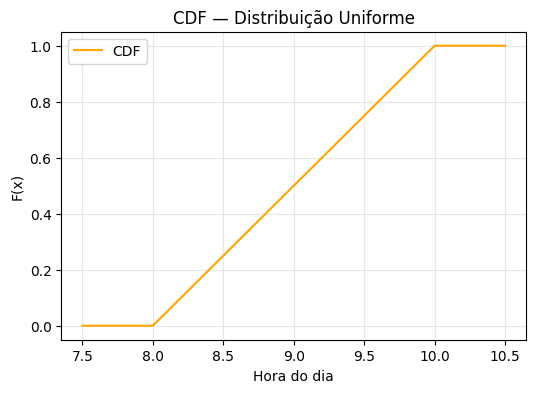

In [44]:
# CDF da Uniforme
a, b = 8.0, 10.0
x = np.linspace(a - 0.5, b + 0.5, 200)
cdf_vals = st.uniform.cdf(x, loc=a, scale=(b - a))

plt.figure(figsize=(6, 4))
plt.plot(x, cdf_vals, color='orange', label='CDF')
plt.title('CDF — Distribuição Uniforme')
plt.xlabel('Hora do dia')
plt.ylabel('F(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Interpretação do gráfico

A leitura da curva é direta e proporcional:

- F(8.0) = 0  
  Ninguém chegou antes das 8h.

- F(8.5) = 0.25  
  25% dos clientes chegam até 8h30.

- F(9.0) = 0.50  
  Metade dos clientes chega até 9h.

- F(9.5) = 0.75  
  75% dos clientes chegam até 9h30.

- F(10.0) = 1.00  
  Todos os clientes já chegaram até as 10h.

A inclinação constante indica que a chance de chegada é a mesma ao longo de todo o intervalo [8, 10].

## Conclusões

- Distribuições de Frequência mostram o que foi observado nos dados reais.

- Distribuições de Probabilidade descrevem o que esperamos observar.

  - A Função de Massa de Probabilidade (PMF) é usada para variáveis discretas;
  - A Função de Densidade de Probabilidade (PDF) para varíaveis contínuas;  
  - A Função de Distribuição Acumulada (CDF) mostra a acumulação da probabilidade.  

Esses conceitos serão a base para testes de hipóteses e inferência estatística.


## Exercícios

### Exercício 1 — Presença em aula

Um professor registrou a presença de um aluno em 30 aulas.  
O resultado foi 1 para presença e 0 para ausência.

In [15]:
import numpy as np
presencas = np.random.choice([0, 1], size=30, p=[0.2, 0.8])
presencas

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0])

Perguntas:
1. A variável é discreta ou contínua?  
2. Qual distribuição melhor descreve o fenômeno?  
3. Calcule e interprete:
   - Probabilidade de presença (p)
   - PMF e CDF da distribuição  
4. Plote a distribuição e comente o formato.


3. Cálculo e Interpretação:

Probabilidade de Presença (p) estimada da amostra: 0.70

PMF (Função Massa de Probabilidade):
  P(X = 0) [Ausência]: 0.30
  P(X = 1) [Presença]: 0.70

CDF (Função de Distribuição Acumulada):
  P(X <= 0): 0.30
  P(X <= 1): 1.00

Com base nessa amostra a taxa de presença observada do aluno é de 70%.
Caso nessa escola tenha a questão dos 25% de faltas, esse aluno estaria fora do limite permitido para aprovação.

4. Gráfico da distribuição


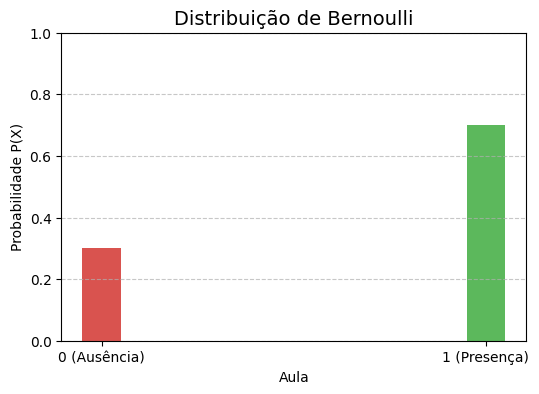

In [17]:
# 1. Essa é uma variável discreta, por justamente só ter valores finitos, no caso 0 e 1.

# 2. Bernoulli, pois nesse cenário só há dois resultados possíveis: presença (1) ou ausência (0).

# 3. 
# 3.1 - Probabilidade de presença (p)
p_estimado = np.mean(presencas)
q_estimado = 1 - p_estimado  # probabilidade de ausência

print("3. Cálculo e Interpretação:\n")
print(f"Probabilidade de Presença (p) estimada da amostra: {p_estimado:.2f}")

# 3.2 - PMF (Função Massa de Probabilidade) - probabilidade de cada valor discreto
pmf = {
    0: q_estimado,  # P(X = 0)
    1: p_estimado   # P(X = 1)
}
print(f"\nPMF (Função Massa de Probabilidade):")
print(f"  P(X = 0) [Ausência]: {pmf[0]:.2f}")
print(f"  P(X = 1) [Presença]: {pmf[1]:.2f}")

# 3.3 - CDF (Função de Distribuição Acumulada) - probabilidade acumulada P(X <= x)
cdf = {
    "P(X < 0)": 0.0,
    "P(X <= 0)": q_estimado,       # Prob(ausência)
    "P(X <= 1)": q_estimado + p_estimado  # Prob(ausência) + Prob(presença) = 1.0
}
print(f"\nCDF (Função de Distribuição Acumulada):")
print(f"  P(X <= 0): {cdf['P(X <= 0)']:.2f}")
print(f"  P(X <= 1): {cdf['P(X <= 1)']:.2f}")

print(f"\nCom base nessa amostra a taxa de presença observada do aluno é de {p_estimado*100:.0f}%.")
print("Caso nessa escola tenha a questão dos 25% de faltas, esse aluno estaria fora do limite permitido para aprovação.\n")

# 4. 
# Usando os valores da PMF para plotar Bernoulli
valores = list(pmf.keys())
probabilidades = list(pmf.values())

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(valores, probabilidades, color=['#d9534f', '#5cb85c'], width=0.1)

ax.set_title('Distribuição de Bernoulli', fontsize=14)
ax.set_xlabel('Aula')
ax.set_ylabel('Probabilidade P(X)')
ax.set_xticks([0, 1])
ax.set_xticklabels(['0 (Ausência)', '1 (Presença)'])
ax.set_ylim(0, 1.0)
ax.grid(axis='y', linestyle='--', alpha=0.7)

print("4. Gráfico da distribuição")

 O gráfico mostra justamente as duas possibilidades de resultado para a presença de um aluno.

### Exercício 2 — Número de peças defeituosas

In [18]:
defeitos = np.random.poisson(lam=2, size=50)
defeitos

array([1, 0, 4, 2, 1, 3, 2, 6, 1, 1, 2, 2, 1, 3, 4, 1, 3, 1, 4, 4, 2, 0,
       0, 2, 2, 2, 1, 5, 4, 0, 1, 2, 2, 0, 2, 2, 3, 1, 0, 2, 2, 1, 3, 2,
       3, 2, 0, 2, 1, 1], dtype=int32)

Perguntas:
1. A variável é discreta ou contínua?  
2. Essa situação é compatível com qual distribuição? Justifique.  
3. Estime o parâmetro λ (lambda).  
4. Calcule e plote:
   - PMF da Poisson;
   - CDF acumulada até 5 defeitos.
5. Interprete a probabilidade de observar até 3 defeitos em uma hora.

3. Valor de lambda:

O λ estimado da amostra: 1.9200
--------------------
4. Cálculo de PMF e CDF

CDF com a probabilidade acumulada até 5 defeitos:
  P(X <= 0): 0.1466
  P(X <= 1): 0.4261
  P(X <= 2): 0.6966
  P(X <= 3): 0.8704
  P(X <= 4): 0.9541
  P(X <= 5): 0.9861

Gráficos da PMF e CDF
--------------------
5. Probabilidade de observar até 3 defeitos: 0.8704
Em 87.04% das 100000 horas simuladas, foi observado 3 ou menos defeitos.


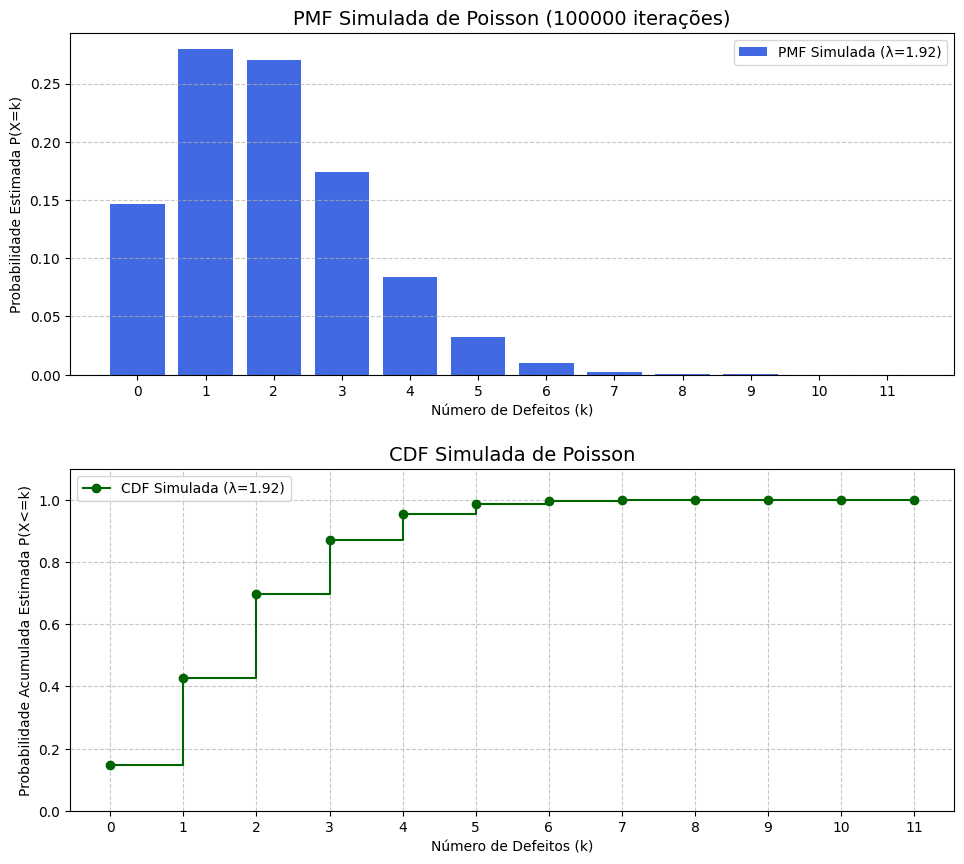

In [21]:
#1. A variável é discreta, pois conta o número de peças com problemas, resultando em inteiros.

#2. Poisson, pois estamos contando o número de eventos, peças com defeito, em um intervalo fixo.

#3. 
# Para estimar λ de uma distribuição de Poisson, basta fazer a média da amostra
lambda_estimado = np.mean(defeitos)
print("3. Valor de lambda:\n")
print(f"O λ estimado da amostra: {lambda_estimado:.4f}")
print("--------------------")

#4. 
print("4. Cálculo de PMF e CDF\n")
# Primeiro é necessário simular um grande número de eventos usando o λ estimado
n_simulacoes = 100000  # Quanto maior, mais precisa a simulação
sim_poisson = np.random.poisson(lam=lambda_estimado, size=n_simulacoes)

# Calcular a PMF
valores_unicos, contagens = np.unique(sim_poisson, return_counts=True)
pmf_empirica = contagens / n_simulacoes

# Calcular a CDF (Soma Acumulada da PMF)
cdf_empirica = np.cumsum(pmf_empirica)

# Mostra o acumulado de até 5 defeitos
print("CDF com a probabilidade acumulada até 5 defeitos:")
for k_cdf in range(6):
    # A probabilidade P(X <= k) é a média da condição (sim_poisson <= k)
    # Isso conta quantas vezes a condição é Verdadeira (1) e divide pelo total.
    prob_acumulada_simulada = np.mean(sim_poisson <= k_cdf)
    print(f"  P(X <= {k_cdf}): {prob_acumulada_simulada:.4f}")

# Plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 9))

# Plot PMF 
ax1.bar(valores_unicos, pmf_empirica, color='royalblue', label=f'PMF Simulada (λ={lambda_estimado:.2f})')
ax1.set_title(f'PMF Simulada de Poisson ({n_simulacoes} iterações)', fontsize=14)
ax1.set_xlabel('Número de Defeitos (k)')
ax1.set_ylabel('Probabilidade Estimada P(X=k)')
ax1.set_xticks(valores_unicos)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot CDF 
ax2.step(valores_unicos, cdf_empirica, where='post', color='darkgreen', marker='o', label=f'CDF Simulada (λ={lambda_estimado:.2f})')
ax2.set_title('CDF Simulada de Poisson', fontsize=14)
ax2.set_xlabel('Número de Defeitos (k)')
ax2.set_ylabel('Probabilidade Acumulada Estimada P(X<=k)')
ax2.set_xticks(valores_unicos)
ax2.set_ylim(0, 1.1)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(pad=2.0)
print("\nGráficos da PMF e CDF")
print("--------------------")

# 5.
# Conta quantas vezes o resultado foi <= 3 e divide pelo total de simulações
prob_ate_3_simulada = np.mean(sim_poisson <= 3)

print(f"5. Probabilidade de observar até 3 defeitos: {prob_ate_3_simulada:.4f}")
print(f"Em {prob_ate_3_simulada*100:.2f}% das {n_simulacoes} horas simuladas, foi observado 3 ou menos defeitos.")


### Exercício 3 — Alturas de jogadores

In [22]:
alturas = np.random.normal(loc=1.98, scale=0.08, size=300)
alturas

array([1.85215912, 1.82239231, 2.12100366, 2.10372155, 1.96259759,
       2.10975963, 2.02414948, 1.98477722, 1.93326663, 1.88825587,
       1.94006863, 2.00040067, 2.00608506, 1.95206668, 2.13879395,
       2.04176173, 2.11510118, 1.84466534, 1.91157228, 2.03928058,
       1.9079433 , 1.90476973, 2.07749173, 1.90937402, 2.04339508,
       1.94271415, 1.85325858, 1.88759287, 1.93731766, 1.95969557,
       1.94663795, 1.97411711, 2.05538486, 2.01269444, 2.08404146,
       1.8292632 , 1.87728755, 1.9902375 , 2.02459911, 2.10259929,
       1.93705619, 1.91077671, 2.0245662 , 1.95684841, 2.02051151,
       1.96402116, 1.97126432, 1.88780949, 1.85437522, 1.98655243,
       1.88881559, 2.08982064, 1.8212826 , 2.14213532, 1.98719911,
       2.04919399, 2.01869449, 1.97857038, 2.10529453, 1.98968835,
       2.04501689, 1.94269303, 2.0330451 , 1.90009388, 1.83638482,
       1.91108963, 1.82725133, 1.88004368, 2.08193146, 2.09292911,
       2.02786474, 1.93286022, 2.07392559, 2.03625359, 2.14426

Perguntas:
1. O tipo de variável é discreto ou contínuo?  
2. Que distribuição melhor descreve este conjunto? Por quê?  
3. Estime a média (μ) e o desvio padrão (σ).  
4. Plote o histograma (PDF empírica) e sobreponha a PDF teórica.  
5. Use a CDF para responder:
   - Qual a probabilidade de um jogador ter menos de 1,90m?
   - E entre 1,90m e 2,05m?


3: Estimação dos Parâmetros:

Média (μ) estimada da amostra: 1.9792 m
Desvio Padrão (σ) estimado da amostra: 0.0837 m
(Valores teóricos usados na geração: μ=1.98, σ=0.08)
-------------------------
4: Gráfico da distribuição:
-------------------------
5: Cálculo de Probabilidades via CDF:
Probabilidade de um jogador ter menos de 1,90m: 0.1721 (17.21%)
Probabilidade de um jogador ter entre 1,90m e 2,05m: 0.6293 (62.93%)
--------------------------------------------------


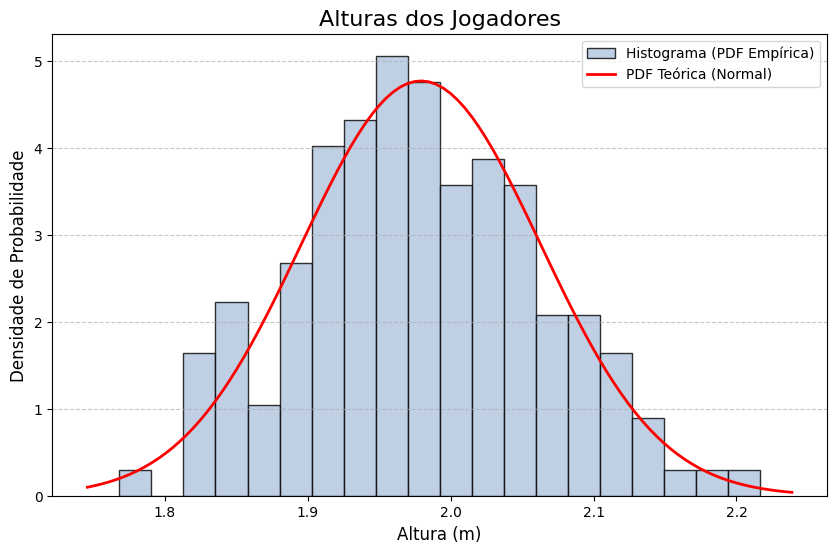

In [23]:
from scipy.stats import norm

#1. Contínua, pois a altura pode assumir qualquer valor dentro de um intervalo.

#2. Distribuição Normal, pois alturas das pessoas tendem a se agrupar ao redor de uma média, tendo menores ocorrências a medida que se afasta disso.

#3. Estimar a média (μ) e o desvio padrão (σ)

mu_estimado = np.mean(alturas)
sigma_estimado = np.std(alturas) 

print("3: Estimação dos Parâmetros:\n")
print(f"Média (μ) estimada da amostra: {mu_estimado:.4f} m")
print(f"Desvio Padrão (σ) estimado da amostra: {sigma_estimado:.4f} m")
print(f"(Valores teóricos usados na geração: μ=1.98, σ=0.08)")
print("-------------------------")


# 4. Plot de Histograma (PDF empírica) e PDF Teórica

fig, ax = plt.subplots(figsize=(10, 6))

# Plot do Histograma (PDF empírica)
# 'density=True' normaliza o histograma para que a área total seja 1
ax.hist(alturas, bins=20, density=True, color='lightsteelblue', edgecolor='k', 
        alpha=0.8, label='Histograma (PDF Empírica)')

# Sobreposição com a PDF Teórica (curva normal)
x_min, x_max = ax.get_xlim()
x_teorico = np.linspace(x_min, x_max, 100)

# Calcula a PDF usando os parâmetros estimados
pdf_teorica = norm.pdf(x_teorico, loc=mu_estimado, scale=sigma_estimado)

ax.plot(x_teorico, pdf_teorica, 'r-', linewidth=2, label='PDF Teórica (Normal)')

ax.set_title('Alturas dos Jogadores', fontsize=16)
ax.set_xlabel('Altura (m)', fontsize=12)
ax.set_ylabel('Densidade de Probabilidade', fontsize=12)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

print("4: Gráfico da distribuição:")
print("-------------------------")



# 5. CDF para calcular probabilidades
# Probabilidade de um jogador ter menos de 1,90m
prob_menor_190 = norm.cdf(1.90, loc=mu_estimado, scale=sigma_estimado)

# E entre 1,90m e 2,05m?
# P(1.90 < X < 2.05) = P(X < 2.05) - P(X < 1.90)
prob_menor_205 = norm.cdf(2.05, loc=mu_estimado, scale=sigma_estimado)
prob_entre_190_205 = prob_menor_205 - prob_menor_190

print("5: Cálculo de Probabilidades via CDF:")
print(f"Probabilidade de um jogador ter menos de 1,90m: {prob_menor_190:.4f} ({prob_menor_190*100:.2f}%)")
print(f"Probabilidade de um jogador ter entre 1,90m e 2,05m: {prob_entre_190_205:.4f} ({prob_entre_190_205*100:.2f}%)")
print("-" * 50)

### Exercício 4 — Tempo até atendimento

In [51]:
tempos = np.random.exponential(scale=3, size=200)
tempos

array([ 1.31341427,  2.49442961,  0.87235161,  7.40556275,  0.92645387,
        6.78478241,  0.32768751,  3.20625217,  7.12500025,  0.55447203,
       10.35686831,  1.80927979,  8.74052799,  3.38863791,  1.07683342,
        0.62588273,  1.08607503,  0.29289607,  0.46599201,  0.33165671,
        1.64944552,  4.7627119 ,  0.45729891,  0.41889135,  3.09366528,
        0.65888539,  0.30812557,  0.54761962,  7.72048171,  5.16901693,
        1.31116717,  3.1997782 ,  2.31187143,  3.39146324,  3.44345001,
        2.9725096 ,  0.92815309,  0.11936265,  1.82402998,  6.64850351,
        2.52840476,  5.35836493, 14.34727726,  0.53600306,  3.53080142,
        3.36527651, 11.72939355, 12.72173413,  3.48157745,  0.83761349,
        4.80672914,  0.33960397,  4.55193435,  7.23038143,  1.4478488 ,
        2.98791229,  1.68710807,  1.72750639,  1.11480404,  4.30808813,
        8.25490447,  8.478012  ,  0.57632046,  6.23217852,  4.01172917,
        0.87441734,  0.20896553,  0.93591309,  7.29836279,  3.00

Perguntas:
1. A variável é discreta ou contínua?  
2. Identifique qual distribuição se aplica.  
3. Estime o parâmetro λ.  
4. Plote a PDF e CDF.  
5. Calcule:
   - Probabilidade de o atendimento durar menos que 2 minutos;
   - Probabilidade de durar entre 2 e 5 minutos.


3. Estimação dos Parâmetros:
Média estimada: 3.2878 minutos
λ estimado: 0.3042 (atendimentos por minuto)
------------------------------- 
4: Gráfico da PDF e CDF
-------------------------------
5: Cálculo de Probabilidades via CDF:
Prob. de durar menos que 2 minutos (P(T < 2)): 0.4557 (ou 45.57%)
Prob. de durar entre 2 e 5 minutos (P(2 < T < 5)): 0.3257 (ou 32.57%)
-------------------------------


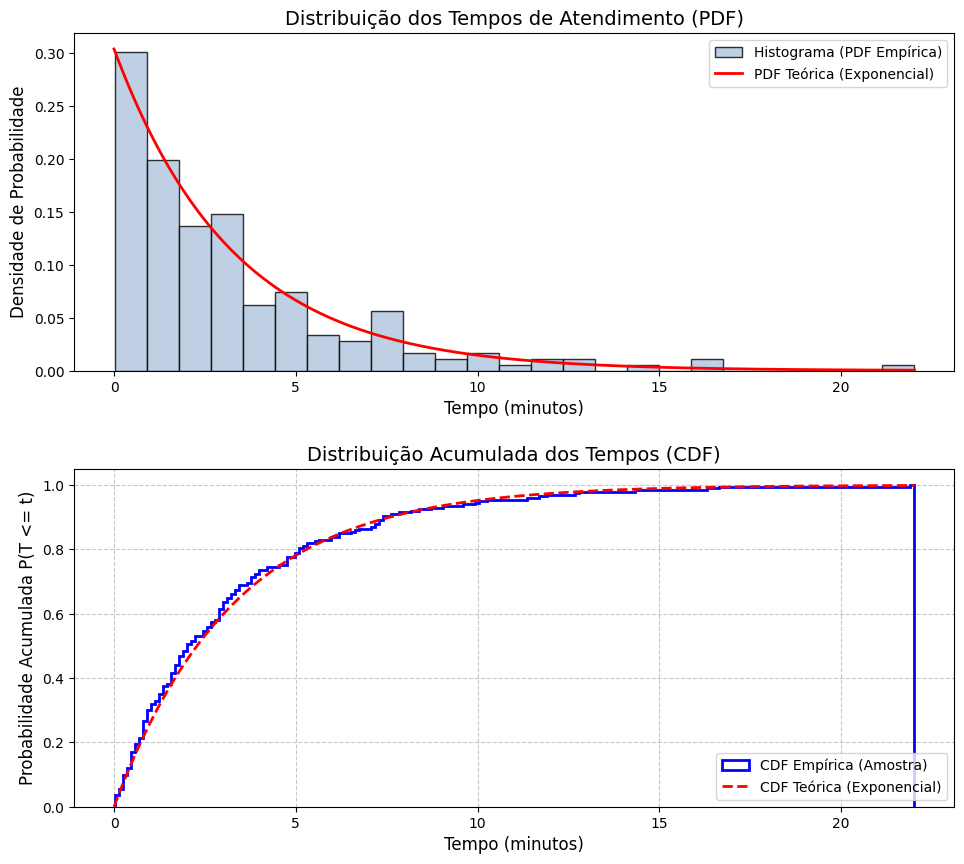

In [99]:
from scipy.stats import expon


# 1. É uma variável contínua, pois o tempo pode assumir qualquer valor dentro de um intervalo.

# 2. Distribuição Exponencial, já que estamos modelando o tempo entre eventos.

# 3. Estima do valor de λ (lambda)
mu_estimado = np.mean(tempos)
lambda_estimado = 1 / mu_estimado
scale_estimado = mu_estimado # Parâmetro scale (β) para usar no scipy

print("3. Estimação dos Parâmetros:")
print(f"Média estimada: {mu_estimado:.4f} minutos")
print(f"λ estimado: {lambda_estimado:.4f} (atendimentos por minuto)")
print("------------------------------- ")


# 4. Plot de PDF e CDF
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 9))
x_max = np.max(tempos)
x_teorico = np.linspace(0, x_max, 200) # Eixo x para as curvas teóricas

# Plot de PDF (Histograma + Curva Teórica)
ax1.hist(tempos, bins=25, density=True, color='lightsteelblue', edgecolor='k', 
         alpha=0.8, label='Histograma (PDF Empírica)')

# Usando expon.pdf com o scale_estimado (que é a média)
pdf_teorica = expon.pdf(x_teorico, loc=0, scale=scale_estimado)
ax1.plot(x_teorico, pdf_teorica, 'r-', linewidth=2, label='PDF Teórica (Exponencial)')

ax1.set_title('Distribuição dos Tempos de Atendimento (PDF)', fontsize=14)
ax1.set_xlabel('Tempo (minutos)', fontsize=12)
ax1.set_ylabel('Densidade de Probabilidade', fontsize=12)
ax1.legend()

# Plot da CDF (Empírica + Curva Teórica)
ax2.hist(tempos, bins=200, density=True, cumulative=True, histtype='step', 
         linewidth=2, color='blue', label='CDF Empírica (Amostra)')

# Usando expon.cdf com o scale_estimado
cdf_teorica = expon.cdf(x_teorico, loc=0, scale=scale_estimado)
ax2.plot(x_teorico, cdf_teorica, 'r--', linewidth=2, label='CDF Teórica (Exponencial)')

ax2.set_title('Distribuição Acumulada dos Tempos (CDF)', fontsize=14)
ax2.set_xlabel('Tempo (minutos)', fontsize=12)
ax2.set_ylabel('Probabilidade Acumulada P(T <= t)', fontsize=12)
ax2.legend(loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(pad=2.0)
print("4: Gráfico da PDF e CDF")
print("-------------------------------")

#5: Cálculo das Probabilidades

# Usando a CDF com os parâmetros estimados
# 5.1 - Probabilidade de o atendimento durar menos que 2 min
prob_menor_2 = expon.cdf(2, loc=0, scale=scale_estimado)

# 5.2 - Probabilidade de durar entre 2 e 5 minutos
# P(2 < T < 5) = P(T < 5) - P(T < 2)
prob_menor_5 = expon.cdf(5, loc=0, scale=scale_estimado)
prob_entre_2_5 = prob_menor_5 - prob_menor_2

print("5: Cálculo de Probabilidades via CDF:")
print(f"Prob. de durar menos que 2 minutos (P(T < 2)): {prob_menor_2:.4f} (ou {prob_menor_2*100:.2f}%)")
print(f"Prob. de durar entre 2 e 5 minutos (P(2 < T < 5)): {prob_entre_2_5:.4f} (ou {prob_entre_2_5*100:.2f}%)")
print("-------------------------------")



### Exercício 5 — Horário de chegada ao estacionamento

In [25]:
chegadas = np.random.uniform(low=7.0, high=9.0, size=100)
chegadas

array([7.65785832, 7.35322942, 8.24582475, 8.47014394, 7.43524909,
       8.9279366 , 8.58443673, 7.98696424, 8.17731606, 8.85378718,
       8.43391957, 7.51597482, 8.25740391, 8.41737677, 8.28407403,
       8.63351671, 7.78198168, 8.24398415, 7.13438762, 8.11698603,
       7.5728773 , 8.8894356 , 8.60591329, 8.01327831, 7.30649924,
       8.92293362, 7.55058786, 7.35826962, 7.1237666 , 7.38557782,
       7.69943565, 8.00448592, 7.94456836, 8.70890609, 7.77492184,
       7.04520202, 7.07410986, 8.52934424, 8.33475457, 7.88530088,
       7.37410312, 7.28318691, 8.9753863 , 8.26162838, 8.3879694 ,
       8.85485928, 8.67454259, 8.60748423, 8.44767856, 7.86523736,
       7.97925608, 8.18368812, 8.86330412, 8.88187056, 7.47429805,
       8.3386988 , 8.90144816, 7.66224836, 7.36838047, 8.41614251,
       7.20091321, 7.8089595 , 8.07942365, 7.5738787 , 8.3343757 ,
       7.0781007 , 8.23493417, 8.66438497, 7.91499045, 8.60771203,
       8.24053141, 7.73712736, 8.40785174, 8.46215412, 7.60551

Perguntas:
1. Que tipo de variável é essa?  
2. Qual distribuição é mais adequada?  
3. Plote o histograma (PDF empírica) e a PDF teórica.  
4. Calcule:
   - Probabilidade de um carro chegar até 8h;
   - Probabilidade entre 7h30 e 8h30.


3: Gráfico da distribuição
--------------------------------
4: Cálculo de Probabilidades via CDF:
Prob. de chegar até 8h (P(T <= 8.0)): 0.5000 (ou 50.00%)
Prob. de chegar entre 7h30 e 8h30 (P(7.5 < T < 8.5)): 0.5000 (ou 50.00%)
--------------------------------


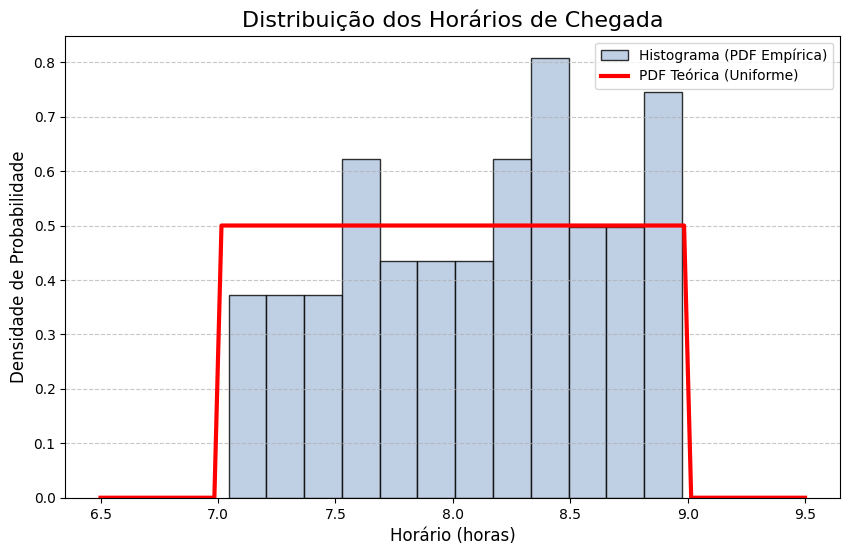

In [26]:
from scipy.stats import uniform # Importa a distribuição uniforme

# 1. A variável é contínua, pois o horário de chegada pode assumir qualquer valor dentro do intervalo.

# 2. Distribuição Uniforme, já que todas as chegadas estão dentro de um horário fixo.

# 3. Plot de Histograma (PDF empírica) e PDF Teórica
fig, ax = plt.subplots(figsize=(10, 6))

# Plot do Histograma (PDF empírica)
# density=True normaliza o histograma (área total = 1)
ax.hist(chegadas, bins=12, density=True, color='lightsteelblue', edgecolor='k', 
        alpha=0.8, label='Histograma (PDF Empírica)')

# Sobreposição da PDF Teórica (curva uniforme)
# Os parâmetros da lib scipy são 'loc' (início) e 'scale' (largura)
loc = 7.0
scale = 9.0 - 7.0
x_teorico = np.linspace(7.0 - 0.5, 9.0 + 0.5, 100) # Eixo x
pdf_teorica = uniform.pdf(x_teorico, loc=loc, scale=scale)

ax.plot(x_teorico, pdf_teorica, 'r-', linewidth=3, label='PDF Teórica (Uniforme)')

ax.set_title('Distribuição dos Horários de Chegada', fontsize=16)
ax.set_xlabel('Horário (horas)', fontsize=12)
ax.set_ylabel('Densidade de Probabilidade', fontsize=12)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

print("3: Gráfico da distribuição")
print("--------------------------------")

# 4. Cálculo das Probabilidades
# Usamos a CDF com os parâmetros teóricos (loc=7.0, scale=2.0)

# 4.1 - Probabilidade de um carro chegar até 8h (P(X <= 8.0))
# (Horário 7.0 = 7h, 8.0 = 8h)
prob_ate_8 = uniform.cdf(8.0, loc=loc, scale=scale)

# 4.2 - Probabilidade entre 7h30 e 8h30 (P(7.5 <= X <= 8.5))
# P(7.5 < X < 8.5) = P(X < 8.5) - P(X < 7.5)
prob_ate_8_5 = uniform.cdf(8.5, loc=loc, scale=scale)
prob_ate_7_5 = uniform.cdf(7.5, loc=loc, scale=scale)
prob_entre_730_830 = prob_ate_8_5 - prob_ate_7_5

print("4: Cálculo de Probabilidades via CDF:")
print(f"Prob. de chegar até 8h (P(T <= 8.0)): {prob_ate_8:.4f} (ou {prob_ate_8*100:.2f}%)")
print(f"Prob. de chegar entre 7h30 e 8h30 (P(7.5 < T < 8.5)): {prob_entre_730_830:.4f} (ou {prob_entre_730_830*100:.2f}%)")
print("--------------------------------")


### Exercício 6 — Aprovados em turmas

In [109]:
n = 10  # número de alunos
p = 0.7  # probabilidade de aprovação
aprovados = np.random.binomial(n=n, p=p, size=100)
aprovados

array([ 7,  7,  4,  8,  8,  8,  7,  8, 10,  7,  6,  9,  6,  8,  6,  7,  5,
        7,  7,  8,  9,  7,  7,  7,  4, 10,  8,  6,  4,  7,  9,  5,  7,  6,
        6,  7,  5,  8,  8,  6,  8,  9,  8,  9,  7,  7,  7,  9,  8,  6,  7,
        7,  7,  6,  5,  7,  8,  7,  8,  8,  5,  8,  6,  7,  7,  6,  7,  6,
        6,  6,  8,  8,  8, 10,  8,  9,  6,  9,  8,  7,  6,  8,  8,  6,  9,
        5,  4,  7,  8,  9,  8,  9,  8,  7,  7,  7,  9,  7,  4,  8],
      dtype=int32)

Perguntas:
1. Que tipo de variável é essa?  
2. Qual distribuição descreve melhor o cenário?  
3. Plote a PMF e a CDF.  
4. Qual a probabilidade de exatamente 8 alunos serem aprovados?  
5. E de no máximo 6 alunos serem aprovados?

-------------------------------
3: Gráficos da PMF e CDF
-------------------------------
4: Prob. de exatamente 8 alunos serem aprovados:

P(X = 8): 0.2326 (ou 23.26%)
--------------------------------------------------
5: Probabilidade de no máximo 6 alunos serem aprovados:

P(X <= 6): 0.3495 (ou 34.95%)
--------------------------------------------------


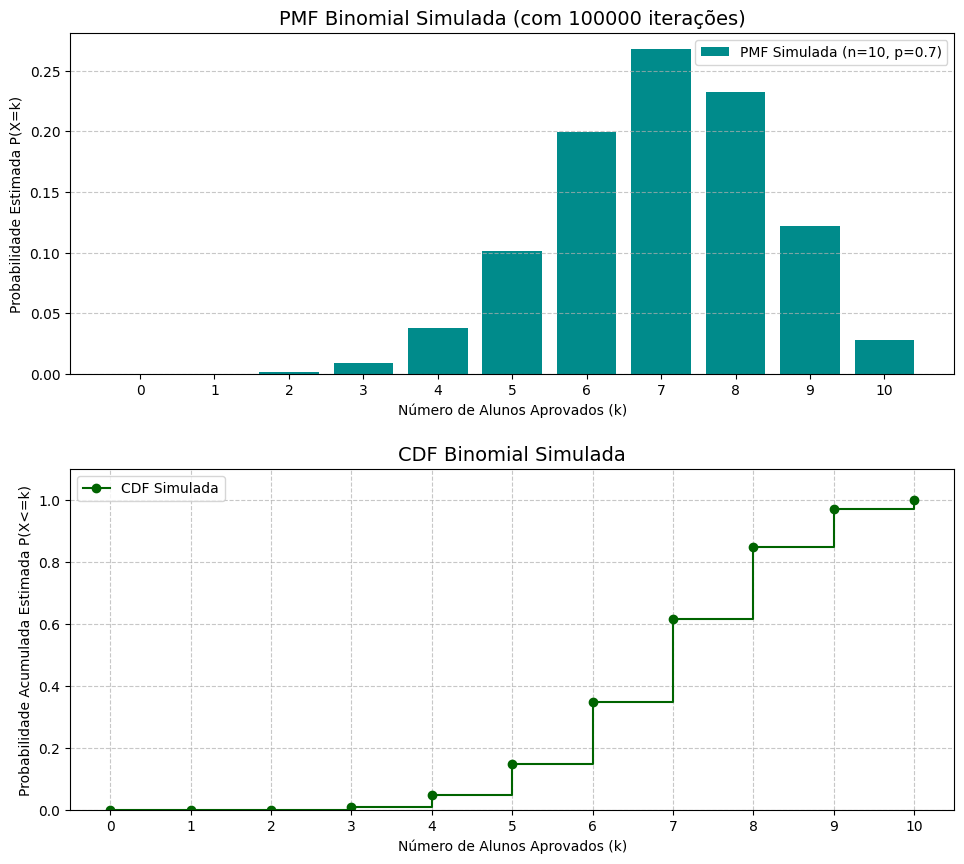

In [117]:
# 1. É uma variável discreta, pois são valores finiitos de número de alunos aprovados.

# 2. Distribuição Binomial, pois estamos contando o número de sucessos (alunos aprovados) 
# em um número fixo de tentativas (número total de alunos).

# 3. Plot de PMF e CDF
# Simulação em massa para estimar melhor o PMF e CDF
n_simulacoes = 100000  # Usar um N grande para uma boa estimativa
sim_binomial = np.random.binomial(n=n, p=p, size=n_simulacoes)
print("-------------------------------")

# Valores possíveis de k (de 0 a 10 aprovados)
k_valores = np.arange(0, n + 1)

# PMF Empírica: Contar a frequência de cada resultado (de 0 a 10)
contagens = np.bincount(sim_binomial, minlength=n + 1)
pmf_simulada = contagens / n_simulacoes

# CDF Empírica: Soma acumulada das frequências
cdf_simulada = np.cumsum(pmf_simulada)

# Plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 9))

# Plot PMF (Função Massa de Probabilidade)
ax1.bar(k_valores, pmf_simulada, color='darkcyan', label=f'PMF Simulada (n={n}, p={p})')
ax1.set_title(f'PMF Binomial Simulada (com {n_simulacoes} iterações)', fontsize=14)
ax1.set_xlabel('Número de Alunos Aprovados (k)')
ax1.set_ylabel('Probabilidade Estimada P(X=k)')
ax1.set_xticks(k_valores)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot CDF (Função de Distribuição Acumulada)
ax2.step(k_valores, cdf_simulada, where='post', color='darkgreen', marker='o', label=f'CDF Simulada')
ax2.set_title('CDF Binomial Simulada', fontsize=14)
ax2.set_xlabel('Número de Alunos Aprovados (k)')
ax2.set_ylabel('Probabilidade Acumulada Estimada P(X<=k)')
ax2.set_xticks(k_valores)
ax2.set_ylim(0, 1.1)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(pad=2.0)
print("3: Gráficos da PMF e CDF")
print("-------------------------------")

# 4. Probabilidade de exatamente 8 alunos serem aprovados

# Calculamos a proporção de vezes que o resultado 8 apareceu na simulação
prob_exato_8_simulada = np.mean(sim_binomial == 8)

print("4: Prob. de exatamente 8 alunos serem aprovados:\n")
print(f"P(X = 8): {prob_exato_8_simulada:.4f} (ou {prob_exato_8_simulada*100:.2f}%)")
print("-" * 50)


# 5. Prob. de no máximo 6 alunos serem aprovados
# Calculamos a proporção de vezes que o resultado foi <= 6
prob_ate_6_simulada = np.mean(sim_binomial <= 6)

print("5: Probabilidade de no máximo 6 alunos serem aprovados:\n")
print(f"P(X <= 6): {prob_ate_6_simulada:.4f} (ou {prob_ate_6_simulada*100:.2f}%)")
print("-" * 50)


### Exercício 7 — Atrasos em voos

Você recebeu um dataset de dados do Bureau of Transportation Statistics (BTS) sobre desempenho de companhias aéreas nos EUA (mês de julho de 2025). Fonte: https://www.transtats.bts.gov/OT_Delay/

O objetivo é analisar o comportamento dos atrasos e propor qual das distribuições estudadas (Bernoulli, Binomial, Poisson, Normal, Exponencial, Uniforme) melhor representa cada variável observada.

Cada linha representa voos de uma companhia aérea para um determinado aeroporto, e as colunas descrevem métricas de desempenho relacionadas a atrasos, cancelamentos e causas dos atrasos. A tabela a seguir apresenta a descrição de cada coluna de dados no dataset.

| Coluna | Descrição |
|-------------|------------------------------|
| `year` | Formato de ano (YYYY). |
| `month` | Formato de mês (1–12). |
| `carrier` | Código de identificação da companhia aérea. |
| `carrier_name` | Nome da companhia aérea. |
| `airport` | Código alfanumérico do aeroporto. |
| `airport_name` | Nome completo e localização do aeroporto. |
| `arr_flights` | Total de voos de chegada. |
| `arr_del15` | Indicador de atraso na chegada (≥15 minutos). |
| `carrier_ct` | Contagem de atrasos por companhia aérea. |
| `weather_ct` | Contagem de atrasos por condições meteorológicas. |
| `nas_ct` | Contagem de atrasos pelo Sistema Nacional de Aviação (NAS). |
| `security_ct` | Contagem de atrasos por incidentes de segurança. |
| `late_aircraft_ct` | Contagem de atrasos por aeronave anterior atrasada. |
| `arr_cancelled` | Número de voos cancelados. |
| `arr_diverted` | Número de voos desviados. |
| `arr_delay` | Atraso de chegada (minutos) (valores negativos indicam chegada antecipada). |
| `carrier_delay` | Tempo total de atraso por companhia aérea (minutos). |
| `weather_delay` | Tempo total de atraso por condições meteorológicas (minutos). |
| `nas_delay` | Tempo total de atraso pelo Sistema Nacional de Aviação (minutos). |
| `security_delay` | Tempo total de atraso por incidentes de segurança (minutos). |
| `late_aircraft_delay` | Tempo total de atraso por aeronave anterior atrasada (minutos). |

<br>

Lembrete:
- Bernoulli: evento com dois resultados possíveis (atrasado ou não).
- Binomial: número de sucessos (atrasos) em um conjunto de voos.
- Poisson: contagem de eventos em um intervalo fixo.
- Normal: valores concentrados ao redor de uma média.
- Exponencial: muitos valores pequenos e poucos grandes.
- Uniforme: todos os valores igualmente prováveis.

<br>
O exercício é dividido em três partes:

#### Parte 1 — Modelagem dos atrasos totais (`arr_delay`)

**Como se distribuem os totais de atraso entre os diferentes aeroportos?**

Esses valores representam o total de minutos de atraso de todos os voos que chegaram a cada aeroporto.

Tarefas:
- Visualize a distribuição (histograma);
- Observe se há assimetria;
- Determine se é discreta ou contínua;
- Escolha entre Normal, Exponencial ou Uniforme qual distribuição melhor representa os atrasos totais.

Perguntas: (ao responder as perguntas, justifique indicando qual distribuição tem esse comportamento)
- A maioria dos atrasos é pequena, e poucos são muito grandes?
- Os atrasos se concentram em torno de uma média (sem assimetria)?
- Todos os valores parecem igualmente prováveis?

<br>

#### Parte 2 — Número de voos atrasados (`arr_del15`)

**Qual distribuição melhor descreve o número de voos atrasados?**

Cada linha contém a contagem de voos atrasados (≥15 min) por aeroporto.

Tarefas:
- Visualize um histograma da variável `arr_del15`.
- Verifique se os dados são contagens (inteiros positivos).

Perguntas: (ao responder as perguntas, justifique indicando qual distribuição tem esse comportamento)
- Essa variável representa o número de eventos ocorrendo em um intervalo fixo (ex: dia ou aeroporto)?
- Se você considerar o total de voos (`arr_flights`) como o número de tentativas, e `arr_del15` como o número de sucessos (atrasos), isso se aproxima de qual distribuição?

<br>

#### Parte 3 — Proporção de voos atrasados (`arr_del15 / arr_flights`)

**Como se distribui a proporção de voos atrasados entre os aeroportos?**

Tarefas:
- Calcule `delay_ratio = arr_del15 / arr_flights`;
- Visualize a distribuição (histograma);
- Compare visualmente com o comportamento esperado de uma Uniforme (todos igualmente prováveis) ou Normal (valores concentrados).

Perguntas: (ao responder as perguntas, justifique indicando qual distribuição tem esse comportamento)
- Há concentração de valores médios (ex: 0.2–0.3)?
- Os valores parecem distribuídos de forma aleatória entre 0 e 1?

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

arquivo_atrasos_aereos = 'files/dataset_atrasos_aereos.csv'

df = pd.read_csv(arquivo_atrasos_aereos)

print("Primeiras linhas:\n")
print(df.head())
print("--------------------------------------")

Primeiras linhas:

   year  month carrier        carrier_name airport  \
0  2025      7      YV  Mesa Airlines Inc.     BWI   
1  2025      7      YV  Mesa Airlines Inc.     CHS   
2  2025      7      YV  Mesa Airlines Inc.     CLE   
3  2025      7      YV  Mesa Airlines Inc.     CLT   
4  2025      7      YV  Mesa Airlines Inc.     CMH   

                                        airport_name  arr_flights  arr_del15  \
0  Baltimore, MD: Baltimore/Washington Internatio...         18.0        2.0   
1       Charleston, SC: Charleston AFB/International         48.0       16.0   
2     Cleveland, OH: Cleveland-Hopkins International         65.0       10.0   
3     Charlotte, NC: Charlotte Douglas International        134.0       31.0   
4    Columbus, OH: John Glenn Columbus International         61.0       12.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        1.43        0.00  ...          0.0              0.00            0.0   
1        4.06  

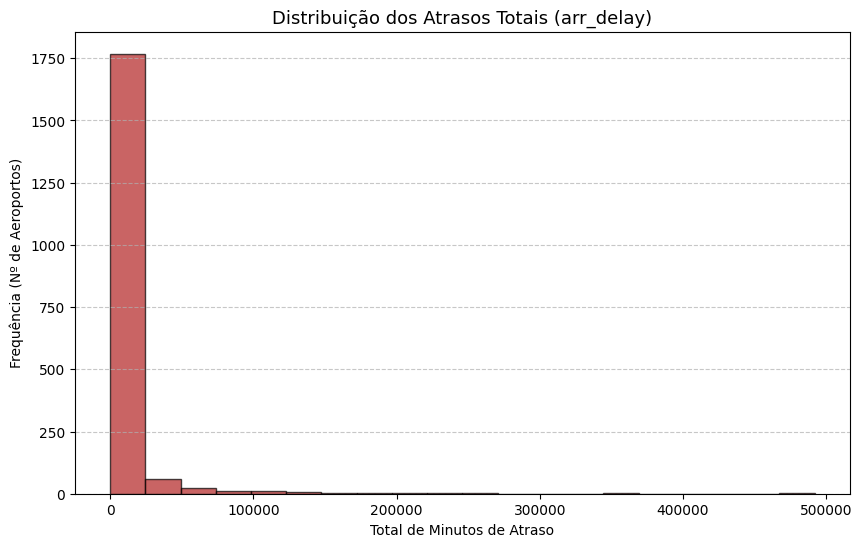

Tipo de variável é contínua, pois o 'tempo' pode assumir qualquer valor.
E é assimétrico, pois possui forte assimetria à direita.
A Distribuição escolhida foi a Exponencial, pois ela é muito boa para modelar quando
há muitos valroes pequeneos e poucos valores muito grandes.



In [155]:
# Parte 1

# Plot da distribuição (histograma)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['arr_delay'], bins=20, color='firebrick', alpha=0.7, edgecolor='k')
ax.set_title('Distribuição dos Atrasos Totais (arr_delay)', fontsize=13)
ax.set_xlabel('Total de Minutos de Atraso')
ax.set_ylabel('Frequência (Nº de Aeroportos)')
ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

print("Tipo de variável é contínua, pois o 'tempo' pode assumir qualquer valor.")
print("E é assimétrico, pois possui forte assimetria à direita.")
print("A Distribuição escolhida foi a Exponencial, pois ela é muito boa para modelar quando")
print("há muitos valroes pequeneos e poucos valores muito grandes.\n")

#### Perguntas

**1 - A maioria dos atrasos é pequena, e poucos são muito grandes?**

Sim, o histograma mostra uma grande concentração de aeroportos com atrasos totais baixos, bem próximos de 0 e uma longa cauda à direita, indicando que poucos aeroportos tiveram atrasos totais massivos, tendo assim o comportamento característico da Distribuição Exponencial.

**2 - Os atrasos se concentram em torno de uma média (sem assimetria)?**

Não, o gráfico é visivelmente assimétrico. A concentração em torno de uma média simétrica descreveria uma Distribuição Normal.

**3 - Todos os valores parecem igualmente prováveis?**

Não, atrasos baixos são muito mais prováveis que atrasos altos. A Distribuição Uniforme é que teria esse comportamento.

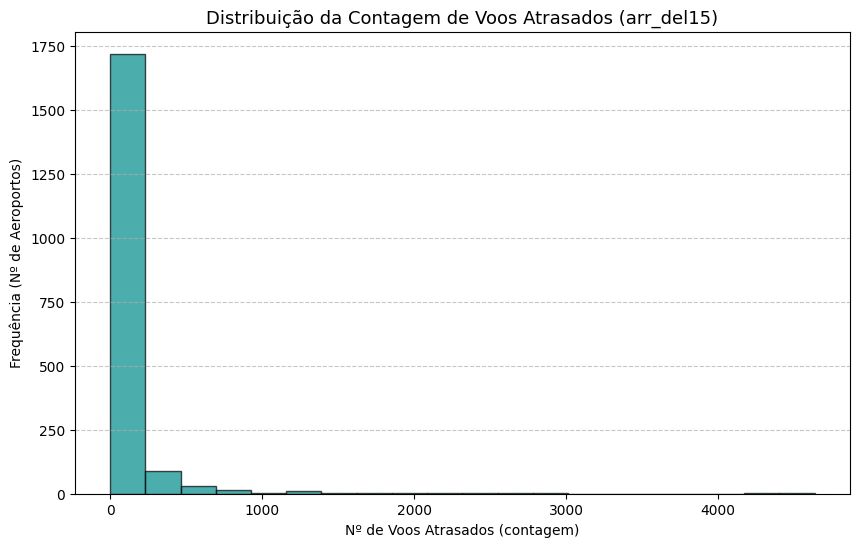

Os dados são sim de contagem, ou seja, inteiros positivos.


In [29]:
# Parte 2

# Plot da variável arr_del15
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['arr_del15'], bins=20, color='darkcyan', alpha=0.7, edgecolor='k')
ax.set_title('Distribuição da Contagem de Voos Atrasados (arr_del15)', fontsize=13)
ax.set_xlabel('Nº de Voos Atrasados (contagem)')
ax.set_ylabel('Frequência (Nº de Aeroportos)')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Os dados são sim de contagem, ou seja, inteiros positivos.")

#### Perguntas:

**1 - Essa variável representa o número de eventos ocorrendo em um intervalo fixo (ex: dia ou aeroporto)?**

Sim, a arr_del15 é uma contagem de eventos (atrasos) por aeroporto. Este cenário é bem modelado pela Distribuição de Poisson, que é ideal para contagens de eventos raros em um intervalo.

**2 - Se você considerar o total de voos (arr_flights) como o número de tentativas, e arr_del15 como o número de sucessos (atrasos), isso se aproxima de qual distribuição?**

Se enquadra na Distribuição Binomial, onde cada um dos arr_flights é uma "tentativa" que pode resultar em "sucesso" (atraso) ou "falha" (no horário).

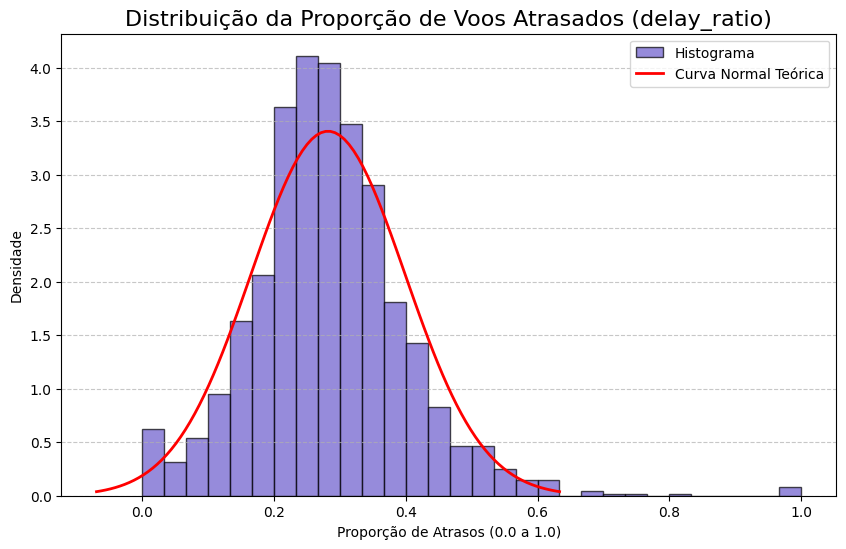

In [157]:
# Parte 3

# Calcula o delay_ratio
df_part3 = df[df['arr_flights'] > 0].copy()
df_part3['delay_ratio'] = df_part3['arr_del15'] / df_part3['arr_flights']

# Plot da distribuição
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_part3['delay_ratio'], bins=30, color='slateblue', alpha=0.7, edgecolor='k', density=True, label='Histograma')

# Sobrepoição com curva Normal teórica para comparação
mu_ratio = df_part3['delay_ratio'].mean()
std_ratio = df_part3['delay_ratio'].std()
x = np.linspace(mu_ratio - 3*std_ratio, mu_ratio + 3*std_ratio, 100)
ax.plot(x, norm.pdf(x, mu_ratio, std_ratio), 'r-', linewidth=2, label='Curva Normal Teórica')

ax.set_title('Distribuição da Proporção de Voos Atrasados (delay_ratio)', fontsize=16)
ax.set_xlabel('Proporção de Atrasos (0.0 a 1.0)')
ax.set_ylabel('Densidade')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Perguntas:

**1 - Há concentração de valores médios (ex: 0.2–0.3)?**

Sim, o histograma mostra um pico claro (em torno de 0.28-0.3), com os valores se tornando menos frequentes à medida que se afastam desse pico e por conta desse comportamento simétrico, em forma de sino, tem a característica principal da Distribuição Normal.

**2 - Os valores parecem distribuídos de forma aleatória entre 0 e 1?**

Não, valores próximos de 0.3 são muito mais prováveis do que valores próximos de 0.5 ou 0.0, se fossem aleatórios, a distribuição seria uniforme com um histograma "reto"